In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython import display

In [18]:
creditCard_df = pd.read_csv("creditcard.csv")
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
creditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
creditCard_df.shape

(284807, 31)

In [21]:
creditCard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
creditCard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.891785e-12,-9.885067e-13,-5.140404e-13,1.253501e-12,5.842808e-14,3.608513e-13,4.918015e-13,-3.225951e-13,-8.510640e-13,...,-1.192419e-12,-3.211685e-13,9.454727e-14,8.163367e-13,-6.605039e-13,9.231933e-14,4.608317e-13,-1.251591e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
creditCard_df.Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [26]:
# separate legitimate and fraudulent transactions

legit = creditCard_df[creditCard_df.Class ==0]
fraud = creditCard_df[creditCard_df.Class ==1]

In [27]:
legit.value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037   1.585949   2.883976   3.378471   1.511706   3.717077   0.585362  -0.156001   0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294   0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617   1.574009   2.889277   3.381404   1.538663   3.698747   0.560211  -0.150911   0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727   0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0   

In [29]:
fraud.value_counts()

Time      V1          V2         V3          V4        V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207.0   -13.192671  12.785971  -9.906650   3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        6
94362.0   -26.457745  16.497472  -30.177317  8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.26

In [30]:
fraud.shape

(492, 31)

In [31]:
legit.shape

(284315, 31)

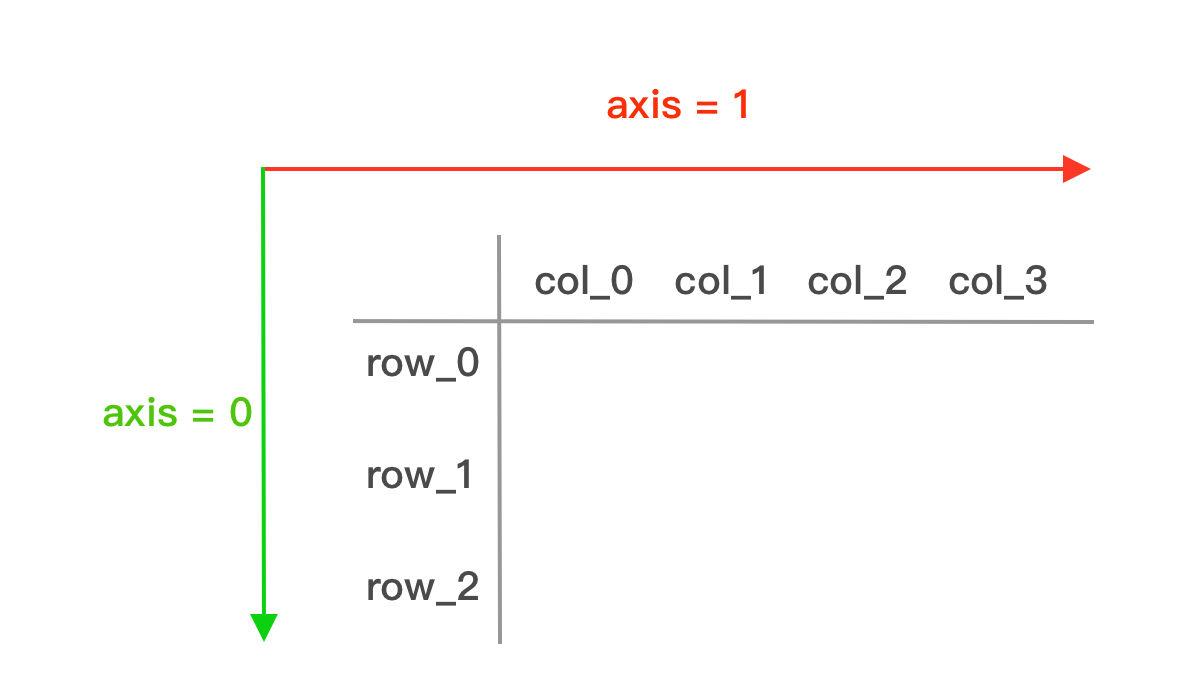

In [51]:
display.Image("pandas_axis.png")

In [34]:
legit_sample = legit.sample(n=492)
credit_card_df = pd.concat([legit_sample, fraud],axis=0)

In [37]:
credit_card_df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [38]:
credit_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94287.662602,0.173899,-0.018095,0.091308,0.062304,0.013502,-0.077150,0.035150,0.044565,-0.065141,...,0.043249,0.002136,0.013025,-0.026135,-0.051553,-0.002774,-0.002413,-0.016485,-0.003896,86.888902
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [40]:
X = credit_card_df.drop('Class', axis=1)
Y = credit_card_df['Class']

In [41]:
X.shape

(984, 30)

In [42]:
Y.shape

(984,)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

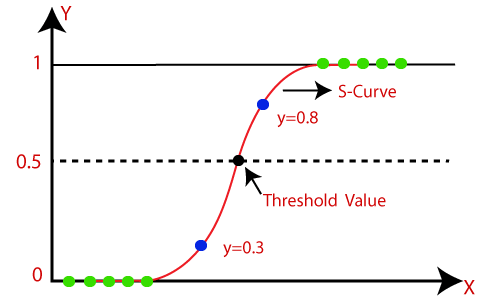

In [46]:
display.Image("logistic_regression.png")

In [47]:
model = LogisticRegression()
model.fit(X_train, Y_train)
ypred = model.predict(X_test)

In [48]:
accuracy_score(ypred, Y_test)

0.9390862944162437

In [53]:
X_test[0:1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
247995,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.62374,0.259562,-1.132044,...,0.284831,0.56445,0.445744,-0.141136,-0.265517,0.36226,-0.416062,0.50737,0.243744,51.37


In [54]:
Y_test[0:1]

247995    1
Name: Class, dtype: int64

In [58]:
Y_test[247995]

1